In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("./data/Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
print(X[:5, ])

[[ 0.84268147  1.          0.12526316  0.40928571  0.5         0.23076923
   0.375       0.05561404  0.          0.          0.          1.          0.5
   0.05        0.01212   ]
 [ 0.69609056  0.          0.13413534  0.25        0.5         0.53846154
   0.375       0.00578947  0.          0.          0.          0.          0.5
   0.08        0.        ]
 [ 0.38898166  0.          0.23804511  0.0625      0.          0.23076923
   0.375       0.04385965  0.          0.          0.          1.          0.5
   0.14        0.        ]
 [ 0.48842545  0.          0.11909774  0.41071429  0.          0.30769231
   0.25        0.          1.          1.          0.1641791   1.          0.5
   0.          0.        ]
 [ 0.60079526  1.          0.09654135  0.29178571  0.5         0.38461538
   0.375       0.06877193  1.          1.          0.20895522  0.          0.5
   0.03        0.00158   ]]


In [5]:
#Build a SOM & Fit the data

from minisom import MiniSom

In [9]:
som = MiniSom(x = 10, y = 10, input_len = X.shape[1], sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

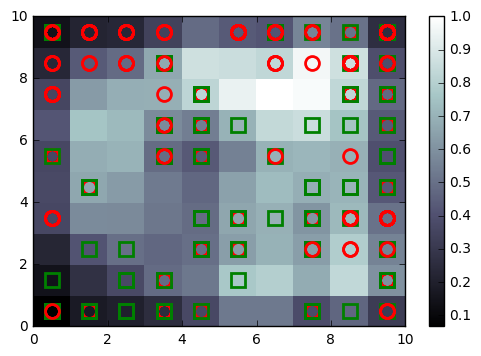

In [21]:
#Visualize the result
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor= 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [23]:
#Find the frauds
mappings = som.win_map(X)
frauds = mappings[(7,8)]
frauds = sc.inverse_transform(frauds)

In [24]:
print frauds

[[  1.58005540e+07   0.00000000e+00   4.53300000e+01   1.00000000e+00
    2.00000000e+00   1.10000000e+01   4.00000000e+00   1.25000000e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    2.00000000e+00   2.63000000e+02   1.00000000e+00]]
